In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Download df's

-- df with the standardized and df with nonstandardized GPM

In [32]:
dfNS = pd.read_csv('/Users/keri/git/DotLovesData/data/formattedDf.csv')
dfNS.head()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index,n,Pop,Date_Crime,crime_cat,talb_cat,Date_GMP
0,500100,62.732541,9.0,0,401,2018-02-01,0,21,2013-03-01
1,500100,62.732541,9.0,0,402,2018-03-01,0,21,2013-03-01
2,500100,62.732541,9.0,0,408,2018-04-01,0,21,2013-03-01
3,500100,62.732541,9.0,0,409,2018-05-01,0,21,2013-03-01
4,500100,62.732541,9.0,0,410,2018-06-01,0,21,2013-03-01


In [33]:
dfNS.dtypes 

AU2017_code            int64
AU_GMP_PER_CAPITA    float64
Dep_Index            float64
n                      int64
Pop                    int64
Date_Crime            object
crime_cat              int64
talb_cat               int64
Date_GMP              object
dtype: object

In [36]:
#convert datetime to category and then codes to run through models
dfNS["dt_crime_cat"] = dfNS["Date_Crime"].astype('category')
dfNS["dt_crime_cat"] = dfNS["dt_crime_cat"].cat.codes
dfNS["date_gmp_cat"] = dfNS["Date_GMP"].astype('category')
dfNS["date_gmp_cat"] = dfNS["date_gmp_cat"].cat.codes

In [37]:
#there were no duplicates
dfNS.drop_duplicates(inplace=True,ignore_index=True)

In [39]:
dfNS.drop(columns=['Date_Crime','Date_GMP'],inplace=True)

In [40]:
dfNS.shape

(6897345, 9)

In [41]:
dfNS.dtypes

AU2017_code            int64
AU_GMP_PER_CAPITA    float64
Dep_Index            float64
n                      int64
Pop                    int64
crime_cat              int64
talb_cat               int64
dt_crime_cat            int8
date_gmp_cat            int8
dtype: object

In [42]:
dfNS.head()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index,n,Pop,crime_cat,talb_cat,dt_crime_cat,date_gmp_cat
0,500100,62.732541,9.0,0,401,0,21,0,0
1,500100,62.732541,9.0,0,402,0,21,1,0
2,500100,62.732541,9.0,0,408,0,21,2,0
3,500100,62.732541,9.0,0,409,0,21,3,0
4,500100,62.732541,9.0,0,410,0,21,4,0


In [43]:
holdoutDf = dfNS.sample(frac=0.20)

In [44]:
dfNS.shape #doesn't take the rows out of original df

(6897345, 9)

In [45]:
holdoutDf.index

Int64Index([5088197, 4851490, 3307391, 5692823, 6652441, 1872040, 6556540,
            6287500, 3676955, 3358562,
            ...
             552144, 4192984, 6535711, 2319550, 1625910, 5833204, 6819461,
            4851432, 2637909,   47937],
           dtype='int64', length=1379469)

In [46]:
holdoutDf = dfNS.loc[list(holdoutDf.index)]

In [47]:
holdoutDf.shape

(1379469, 9)

In [48]:
dfNS.shape

(6897345, 9)

# Look at value distributions for holdout v modeling df

In [49]:
dfNS.describe()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index,n,Pop,crime_cat,talb_cat,dt_crime_cat,date_gmp_cat
count,6.897345e+06,6.897345e+06,6.897345e+06,6.897345e+06,6.897345e+06,6.897345e+06,6.897345e+06,6.897345e+06,6.897345e+06
mean,5.136536e+05,5.547114e+01,5.664226e+00,1.094892e+00,3.746800e+03,6.000000e+00,1.164622e+01,1.700000e+01,1.500000e+01
std,7.919772e+03,3.847505e+01,2.949952e+00,3.124968e+00,2.204207e+03,3.741658e+00,7.165271e+00,1.009951e+01,8.944273e+00
min,5.001000e+05,0.000000e+00,1.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.066460e+05,3.201995e+01,3.000000e+00,0.000000e+00,2.158000e+03,3.000000e+00,6.000000e+00,8.000000e+00,7.000000e+00
50%,5.136100e+05,5.250710e+01,5.000000e+00,0.000000e+00,3.575000e+03,6.000000e+00,1.100000e+01,1.700000e+01,1.500000e+01
75%,5.212010e+05,7.299246e+01,8.000000e+00,1.000000e+00,5.083000e+03,9.000000e+00,1.800000e+01,2.600000e+01,2.300000e+01
max,5.261050e+05,3.912583e+02,1.000000e+01,1.130000e+02,1.544700e+04,1.200000e+01,2.300000e+01,3.400000e+01,3.000000e+01


In [50]:
holdoutDf.describe()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index,n,Pop,crime_cat,talb_cat,dt_crime_cat,date_gmp_cat
count,1.379469e+06,1.379469e+06,1.379469e+06,1.379469e+06,1.379469e+06,1.379469e+06,1.379469e+06,1.379469e+06,1.379469e+06
mean,5.136639e+05,5.547894e+01,5.665796e+00,1.094979e+00,3.750528e+03,6.002108e+00,1.164110e+01,1.699881e+01,1.499373e+01
std,7.916591e+03,3.846452e+01,2.950681e+00,3.130066e+00,2.201808e+03,3.741431e+00,7.165941e+00,1.009725e+01,8.942177e+00
min,5.001000e+05,0.000000e+00,1.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.066460e+05,3.201864e+01,3.000000e+00,0.000000e+00,2.167000e+03,3.000000e+00,6.000000e+00,8.000000e+00,7.000000e+00
50%,5.136100e+05,5.252768e+01,5.000000e+00,0.000000e+00,3.578000e+03,6.000000e+00,1.100000e+01,1.700000e+01,1.500000e+01
75%,5.212010e+05,7.300192e+01,8.000000e+00,1.000000e+00,5.084000e+03,9.000000e+00,1.800000e+01,2.600000e+01,2.300000e+01
max,5.261050e+05,3.912583e+02,1.000000e+01,1.130000e+02,1.544700e+04,1.200000e+01,2.300000e+01,3.400000e+01,3.000000e+01


In [ ]:
#distributions between validation and modeling dataset look almost exactly the same

# Asking question:  Can we predict the GMP with features for deprivation score and crime statistics

-- Run GradientboostedRegressor, and LogisticRegression

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
def split_data_train_model(X,Y):
    # 20% examples in test data
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=57)
 
    # training data fit
    reg = GradientBoostingRegressor(random_state=0)
    reg.fit(X_train, y_train)

    y_hat = reg.predict(X_test)

    score = reg.score(X_test, y_test)
 
    return(y_hat, score, reg, X_test,y_test)


In [ ]:
X = dfNS.drop(columns=['AU_GMP_PER_CAPITA'])
y = dfNS['AU_GMP_PER_CAPITA']

In [54]:
X_holdout = holdoutDf.drop(columns=['AU_GMP_PER_CAPITA'])
y_holdout = holdoutDf['AU_GMP_PER_CAPITA']

In [52]:
y_hat, score, reg, X_test,y_test = split_data_train_model(X,y)

In [53]:
print(score)

0.7553673558661818


In [56]:
validation_predict = reg.predict(X_holdout)
reg_holdout_score = reg.score(X_holdout,y_holdout)
reg_holdout_score

0.7556835880670938

In [57]:
reg.feature_importances_

array([5.86627651e-01, 2.29360257e-01, 1.77853639e-03, 1.21426001e-01,
       0.00000000e+00, 3.04488784e-02, 6.96521414e-05, 3.02890246e-02])

In [58]:
reg_feature_importances = pd.DataFrame()
reg_feature_importances['features'] = X_holdout.columns
reg_feature_importances['importance'] = reg.feature_importances_
reg_feature_importances

,features,importance
0,AU2017_code,0.586628
1,Dep_Index,0.229360
2,n,0.001779
3,Pop,0.121426
4,crime_cat,0.000000
5,talb_cat,0.030449
6,dt_crime_cat,0.000070
7,date_gmp_cat,0.030289


In [61]:
reg_feature_importances.sort_values(by='importance',ascending=True,inplace=True)

In [73]:
import matplotlib.pyplot as plt

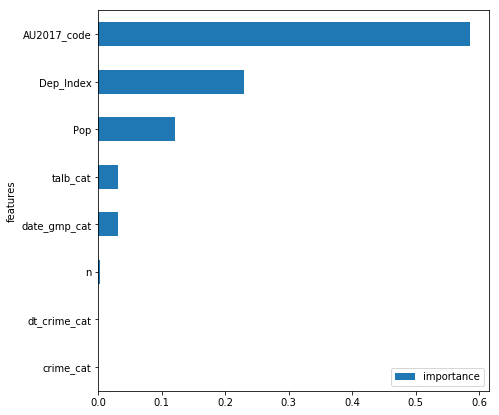

In [75]:
reg_feature_importances.plot(kind='barh',y='importance', x='features',figsize=(7,7))
plt.legend(loc='lower right')
plt.savefig('/Users/keri/git/DotLovesData/visuals/featureImportances.png')

In [59]:
from sklearn.linear_model import RidgeCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=57)
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train, y_train)
score_clf = clf.score(X_test, y_test)
y_hat_clf = clf.predict(X_test)


In [60]:
print(score_clf)

0.19608128702668726
